Отчет,раскрывающий характер и особенности задержек авиарейсов

План действий:
Изучить зависимость задержержек от всевозможных факторов, информация о которых представлена в 2 приложенных ниже таблицах, и сделать выводы. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [280]:
url1 = ('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv')
url2 = ('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv')
flight = pd.read_csv(url1, sep=',')
weather =  pd.read_csv(url2, sep=',')

In [291]:
flight.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [282]:
weather.head()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


In [283]:
flights = flight.merge(weather, on = ['year','month', 'day', 'hour', 'origin'], how='inner')

In [287]:
#Еще раз ознакомимся с всевозможными факторами, представленными в таблице
flights.columns

Index(['Unnamed: 0_x', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute', 'Unnamed: 0_y',
       'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust',
       'precip', 'pressure', 'visib'],
      dtype='object')

Для начала оценим какой процент задержек авиарейсов приходится на каждый аэропорт. 
Однако, прежде чем делать справедливую оценку, нужно узнать сколько всего рейсов приходится на каждый аэропорт. 

In [445]:
flight_sum = flight.origin.value_counts().reset_index(name='sum_flights')
flight_sum

,index,sum_flights
0,EWR,120835
1,JFK,111279
2,LGA,104662


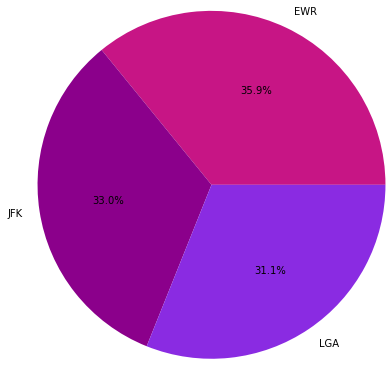

In [316]:
plt.pie(flight_sum.sum_flights,labels=['EWR','JFK','LGA'],colors=['mediumvioletred','darkmagenta','blueviolet'], autopct='%1.1f%%', radius=2)
plt.show()

Как мы видим, на каждый аэропорт приходится примерно одинаковое количество рейсов. Следовательно, следующие выводы будут равносильны по отношению ко всем 3 аэропортам.

Теперь можно оценить количество задержек на каждый аэропорт.

In [442]:
origin_delay = pd.DataFrame(flight[flight.arr_delay>0].groupby(['origin'])['arr_delay'].sum().reset_index(name='sum_delay'))
origin_delay

,origin,sum_delay
0,EWR,2091787.0
1,JFK,1715826.0
2,LGA,1558101.0


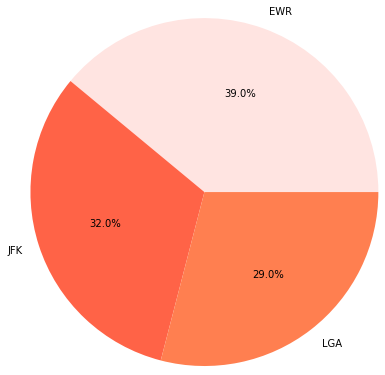

In [443]:
plt.pie(origin_delay.sum_delay, labels=['EWR','JFK','LGA'],colors=['mistyrose','tomato','coral'], autopct='%1.1f%%', radius=2)
plt.show()

Можно заметить, что самое большое суммарное количество задержек приходится на аэропорт EWR.  

Также, в таблице представлены два вида задержек, задержка прилета в указанный аэропорт и задержка вылета из него. 
Я посчитала нужным установить зависимость между двумя видами задержек, чтобы в последующих рассуждениях использовать одну из них (где это непринципиально)

In [133]:
#Суммарное время задержки вылета и прилета в месяц
f=flights[flights.dep_delay>0]
dep_delay=pd.DataFrame(f.groupby(['month'])['dep_delay'].size().reset_index(name='sum_dep_delay'))
f=flights[flights.arr_delay>0]
arr_delay=pd.DataFrame(f.groupby(['month'])['arr_delay'].size().reset_index(name='sum_arr_delay'))

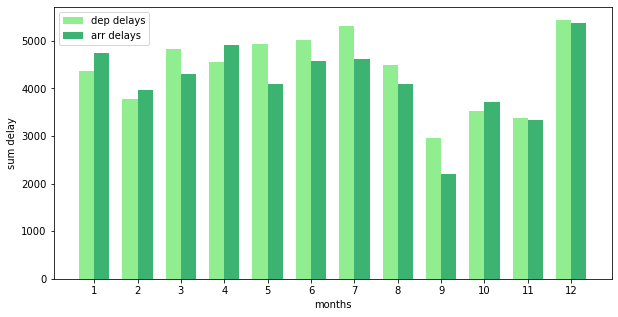

In [160]:
x = dep_delay.month
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, dep_delay.sum_dep_delay , width, label='dep delays',color='lightgreen')
rects2 = ax.bar(x + width/2, arr_delay.sum_arr_delay , width, label='arr delays',color='mediumseagreen')
plt.ylabel('sum delay')
plt.xlabel('months')
plt.xticks(x)
plt.legend()
plt.show()


Глядя на полученную диаграмму можно выделить несколько особенностей:
    1. Пик задержек приходится на июль и декабрь.
    2. Задержки вылета практически линейно зависят от задержек прилета.

Теперь попробуем установить зависимость между средней задержкой и временем. 

In [104]:
hour_delay = pd.DataFrame(flights[flights.arr_delay>0].groupby(['hour'])['arr_delay'].mean().reset_index(name='mean_delay'))
hour_delay.head(24)

,hour,mean_delay
0,0.0,196.292208
1,1.0,255.408163
2,2.0,292.250000
3,4.0,8.833333
4,5.0,10.090698
5,6.0,13.457989
6,7.0,21.364738
7,8.0,23.385259
8,9.0,30.658547
9,10.0,28.353418


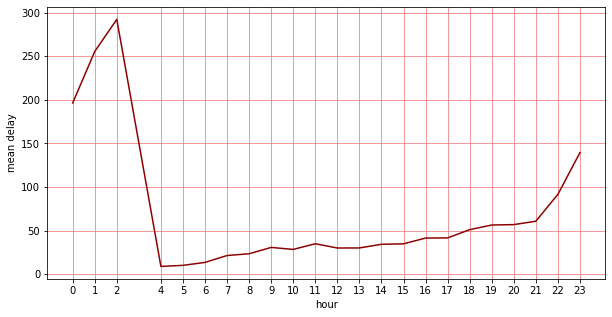

In [235]:
plt.figure(figsize=(10,5))

plt.plot(hour_delay.hour,hour_delay.mean_delay, color = 'darkred')
plt.xticks(hour_delay.hour)
plt.ylabel('mean delay')
plt.xlabel('hour')
plt.grid(color = 'lightcoral')
plt.show()


Как можно заметить, больше всего задержек приходится на период 23:00-02:00. То есть на ночное время

Посмотрим, как справляется тот или иной авиаперевозчик.

In [333]:
carrier_delay = pd.DataFrame(flights[flights.arr_delay>0].groupby(['carrier'])['arr_delay'].mean().reset_index(name='mean_delay'))
#carrier_delay = carrier_delay.sort_values("mean_delay")
carrier_delay.head()                            

,carrier,mean_delay
0,9E,38.642077
1,AA,42.370438
2,AS,34.609626
3,B6,45.980225
4,DL,41.039931


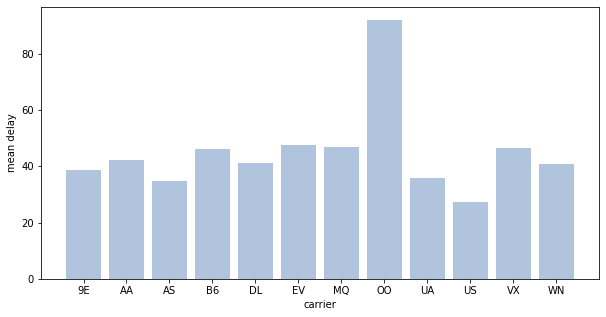

In [438]:
plt.figure(figsize=(10,5))
plt.bar(carrier_delay.carrier, carrier_delay.mean_delay, color = 'lightsteelblue')
plt.xticks(carrier_delay.carrier)

plt.xlabel('carrier')
plt.ylabel('mean delay')
plt.show()

 На диаграмме видно, что большинство задержек приходится на авиаперевозчика OO

Установим зависимость средней задержки от скорости ветра

In [216]:
wind_delay = pd.DataFrame(flights[flights.dep_delay>0].groupby(['wind_speed'])['dep_delay'].mean().reset_index(name='mean_delay'))
wind_delay = wind_delay.sort_values("wind_speed")
wind_delay = wind_delay.drop(labels=[wind_delay.index[-1]])
wind_delay.tail()

,wind_speed,mean_delay
26,32.0,71.285714
27,33.0,45.750000
28,35.0,92.777778
29,39.0,52.200000
30,40.0,32.142857


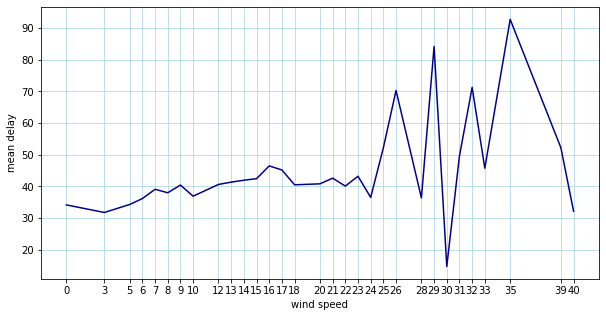

In [435]:
plt.figure(figsize=(10,5))
plt.xticks(wind_delay.wind_speed)
plt.plot(wind_delay.wind_speed, wind_delay.mean_delay, color = 'darkblue')
plt.grid(color = 'lightblue')
plt.xlabel('wind speed')
plt.ylabel('mean delay')
plt.show()

Делаем вывод, что с возрастанием ветра средняя задержка увеличивается. (Думаю, такой резкий скачок на 30, может быть связан например с тем, что самолет летел по направлению ветра)

Посмотрим на зависимость средней задержки от порывов ветра

In [493]:
gust_delay = pd.DataFrame(flights[flights.arr_delay>0].groupby(['wind_gust'])['arr_delay'].mean().reset_index(name='mean_delay'))
gust_delay = gust_delay.drop(labels=[gust_delay.index[-1]])
gust_delay.head()

,wind_gust,mean_delay
0,0.000000,35.799765
1,3.972884,33.103079
2,5.297178,36.173362
3,6.621473,38.404220
4,7.945768,42.938083


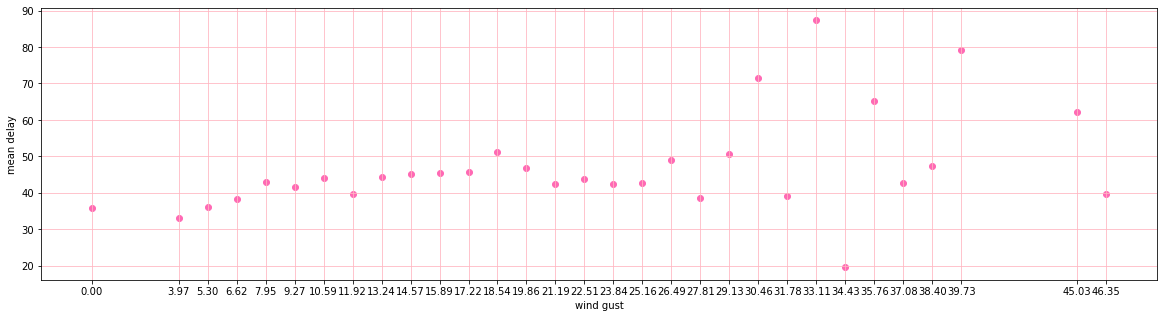

In [492]:
plt.figure(figsize=(20,5))

plt.scatter(gust_delay.wind_gust,gust_delay.mean_delay, color = 'hotpink')
plt.xticks(gust_delay.wind_gust)
plt.ylabel('mean delay')
plt.xlabel('wind gust')
plt.grid(color = 'lightpink')
plt.show()

Самая большая средняя задержка приходится на порыв ветра 33

Обратим внимание на влияние направления ветра на задержку самолета.

In [240]:
wind_dir_delay= pd.DataFrame(flights[flights.dep_delay>0].groupby(['wind_dir'])['dep_delay'].mean().reset_index(name='mean_delay'))
wind_dir_delay = wind_dir.sort_values("wind_dir")
wind_dir_delay.head()

,wind_dir,mean_delay
0,0.0,34.172414
1,10.0,34.266805
2,20.0,32.229903
3,30.0,38.397048
4,40.0,46.386068


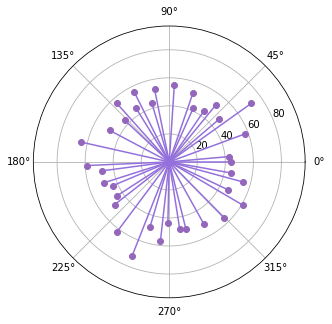

In [427]:
plt.figure(figsize=(5,5))
theta = wind_dir_delay.wind_dir
radii = wind_dir_delay.mean_delay
ax = plt.subplot(111, projection='polar')
ax.stem(theta, radii+10,linefmt = 'mediumpurple',markerfmt='C4o',use_line_collection=True)
plt.show()

Поймем, в какие пункты назначения самолет будет задерживаться больше всего. ( В связи с тем, что пунктов назначения очень много, будем брать отсчет начиная со средней задержки вылета = 45 )

In [470]:
flights_dest = pd.DataFrame(flights[flights.arr_delay>0].groupby(['dest'])['arr_delay'].mean().reset_index(name='mean_delay'))
flights_dest = flights_dest[flights_dest.mean_delay>45].head()
flights_dest.head()

,dest,mean_delay
0,ALB,52.065217
5,BDL,48.284722
6,BNA,46.973415
7,BOS,45.637664
11,BWI,45.910256


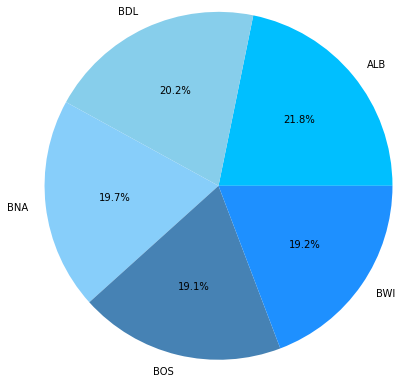

In [473]:
plt.pie(flights_dest.mean_delay, labels=flights_dest.dest, colors=['deepskyblue','skyblue','lightskyblue','steelblue','dodgerblue'], autopct='%1.1f%%', radius=2)
plt.show()

Больше всего задержек будет в аэропорты представленные выше.

Теперь проанализируем, как видимость влияет на среднюю задержку самолета.

In [356]:
visib_delay = pd.DataFrame(flights[flights.arr_delay>0].groupby(['visib'])['arr_delay'].mean().reset_index(name='mean_delay'))
visib_delay['visib']=visib_delay['visib'].apply(round)
visib_delay.head()

,visib,mean_delay
0,0,56.911677
1,1,68.040115
2,2,59.909858
3,3,50.827338
4,4,47.226444


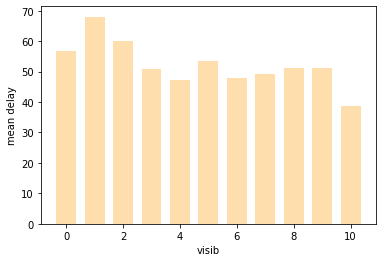

In [478]:
plt.figure(figsize=(6,4))
plt.bar(visib_delay.visib, visib_delay.mean_delay, width = 0.7, color = 'navajowhite')
plt.xlabel('visib')
plt.ylabel('mean delay')
plt.show()


Заметно, что чем хуже видимость, тем больше задержек